<a href="https://colab.research.google.com/github/kserdem/UnsupervisedLearning_Country_Project/blob/main/ContryHelpProject_UnsupervisedL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proje Amacı
* Uluslar arası bir kuruluş olan Help International gelişmiş olmayan devletlere yardım amacıyla 10 milyon dolar yardım topladı. Projede veri setindeki değişkenlerin önemine göre özellik çıkarımı yaparak yardım yapılması gereken devletlerin en iyi şekilde kümelenmesi amaçlanıyor.

* child_mort (1000 canlı doğumda 5 yaşından küçük çocuk ölümü)
* export (kişi başına düşen ihracat %)
* health (kişi başınadüşen sağlık harcaması)
* imports	(kişi başına düşen ithalat)
* income	(kişi başı net gelir miktarı)
* inflation (Toplam GSYİH'nin yıllık büyüme oranının ölçümü)
*	life_expec (Yeni doğan bir çocuğun ortalama beklenen yaşam süresi)
*	total_fer (Her kadının ortalama doğum sayısı)
*	gdpp (Kişi başına düşen GSYİH.)

# KÜTÜPHANELER




In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [ ]:
dictionary= pd.read_csv('/content/drive/MyDrive/Projeler/Unsupervised_data/data-dictionary.csv')

In [ ]:
dictionary.head(20)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


# VERİ SETİNİN YÜKLENMESİ

In [2]:
data= pd.read_csv('/content/drive/MyDrive/Projeler/Unsupervised_data/Country-data.csv')

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# Veri Ön İşleme ve Veriye İlk Bakış

In [4]:
#Country bizim problemimizde index(gözlem birimi) olmalı ancak veri setinde değişken gibi bulunuyor bu yüzden country indexe atıyoruz.
data.index = data.iloc[:,0]
#Yukarıdaki işlemde country indexe atıldığı halde hala veri setinde değişken olarak bulunuyor bu yüzden iloc ile country hariç diğer değişkenleri alıyoruz.
data = data.iloc[:,1:10]
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


 **YORUM:** 167 ülkede;
* Yeni doğan bir bebeğin ortalama yaşam süresi 70.5 yıl
* Bir kadın ortalama 3 doğum yapıyor.
* Doğan her 1000 çocuktan 38'i 5 yaşına gelmeden vefat ediyor.
* Ülkelerin yıllık büyüme oranı ortalama 7.78 

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


#GÖRSELLEŞTİRME

In [6]:
set1=data[['child_mort','health','life_expec','total_fer']]

* Genel yaşam süresi 70.5 yıl olsada boxplot grafiğine bakıldığında bazı ülkeler için yaşam süresinin çok çok düşük olduğu gözlemleniyor. Çocuk ölümlerinin uç değer  gösterdiği ülkeler ile yaşam süresinin uç değer gösterdiği ülkelerin büyük ihtimalle aynı ülkeler olduğu söylenebilir.

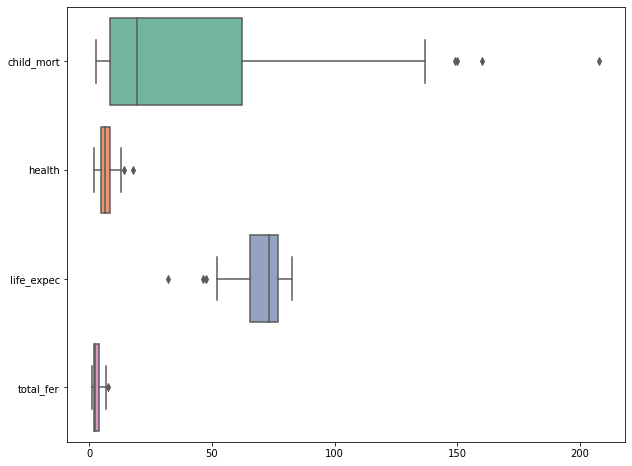

In [7]:
plt.figure(figsize=(10,8))
sns.boxplot(data=set1, orient="h", palette="Set2");

**YORUM:** Pairplot grafiğine ilk bakişta;
* child_mort(5 yaşın altındaki çocuk ölümü /1000'de)  ve total_fert(kadın başına doğum) arasında pozitif yönlü güçlü ilişki var. Yani doğum sayısı arttıkça 5 yaşın altında çocuk ölümüde artıyor.
* imports (kişi başı ithalat miktarı) arttıkça health (sağlık harcaması) artıyor.
* gdpp arttıkça income pozotif yönlü artış sağlıyor.

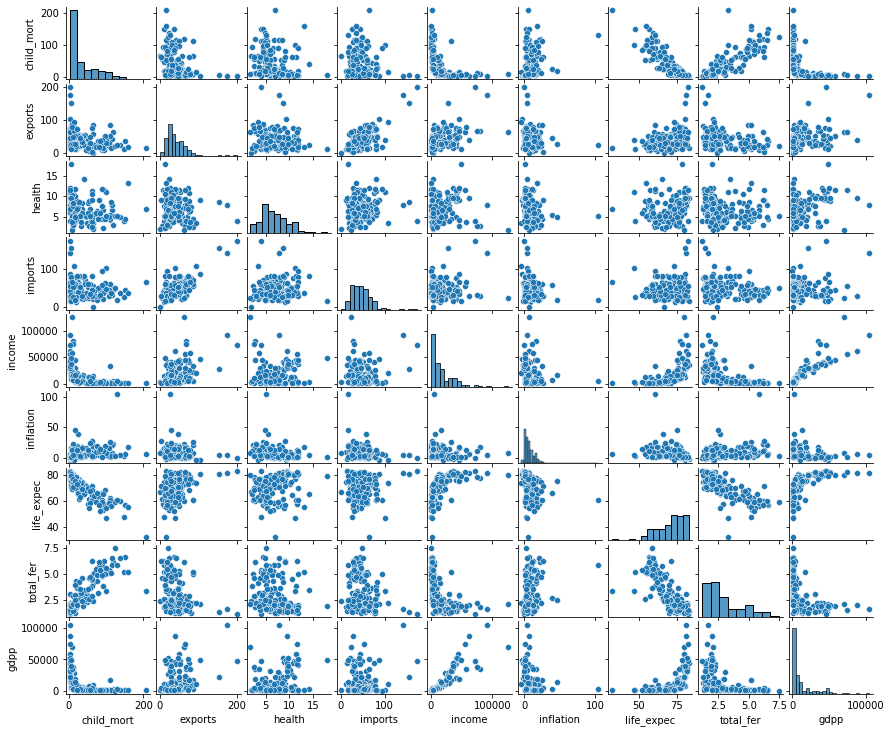

In [ ]:
plot = sns.pairplot(data)
plot.fig.set_size_inches(12,10)

**CORRELATIONS YORUM:**
* gdpp ve total_fert arasında negatif yönde güçlü bir ilişki bulunmakta. Yani kişi başına düşen GSYİH arttıkça doğum oranında bir düşüş olmaktadır dolayısıyla child_mort(çocuk ölümü) daha az gerçekleşmektedir. Gelişmiş ülkelerde doğum oranının ve buna bağlı olarak çocuk ölümlerinin daha az olduğu yorumu yapılabilir.
* health ve life_expec arasında zayıf yönlü ancak pozitif bir ilişki vardır sağlık için yapılan harcama miktarı arttıkça beklenen ortalama yaşam süresi artmaktadır yine gelişmiş ülkelerde yaşam süresinin daha fazla olduğunu söylenebilir.
* income (kişi başı net gelir) ve life_expec arasında pozitif yönlü ciddi bir ilişki olduğu gözlemleniyor. Kişi başına düşen gelir miktarı ne kadar yüksekse ortalama yaşam süresi o kadar artmaktadır.
* Tabloya genel olarak baktığımızda ülkelerin gelişmişlik düzeyini belirlemede total_fert, child_mort değişkenlerinin diğer değişkenlere bağımlı olduğu söylenebilir. Gelişmemiş ülkelerde health,income, gdpp gibi değişkenler daha düşük seviyelerde olduğundan bunlara bağlı olarak daha fazla doğum olmakta ve doğum sayısı arttıkça daha fazla ölüm yaşanmaktadır bu durum ise ortalama yaşam süresini daha aşağı çekmektedir.

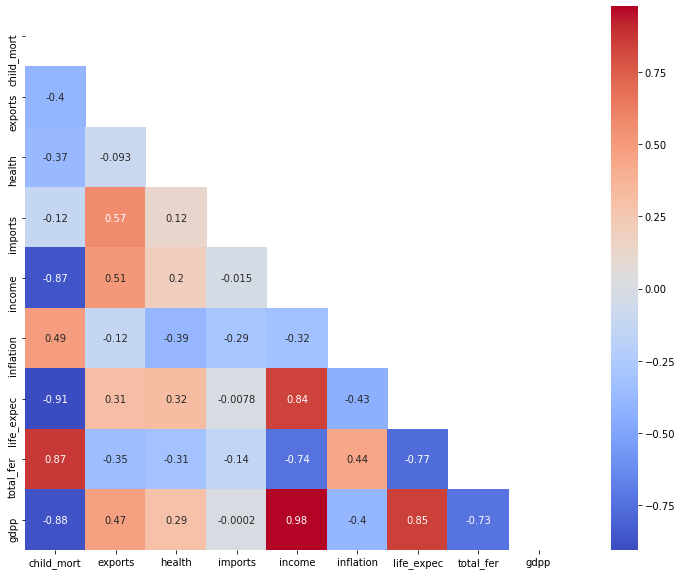

In [ ]:
correlations = data.corr(method='spearman')
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,10))
sns.heatmap(correlations, mask=mask, square=True, cmap='coolwarm', annot=True);

# Kümelemede Kullanılacak Senaryolar
* 1) child_mort, total_fer değişkenlerini veri setinden eleyelim.
* 2) Tüm değişkenleri kullanalım

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [10]:
samp=data[[ 'exports','health','imports','income','inflation','life_expec','gdpp']]


#NORMALİZASYON

* Bu veri setinde değişkenlerin değerleri birbirlerinden farklı ölçeklerde olduğu için kümeleme işlemine başlamadan önce veri setini standartlaştırarak değişkenlerin dağılımlarını,içerdiği bilgiyi değiştirmeden aynı standart forma dönüştürmenin kümeleme yaparken daha başarılı sonuç vereceğini düşünüyorum.
* Bu aşamadan sonraki adımları her iki senaryoda sonuçları daha net gözlemlemek için alt alta yapacağım.

In [16]:
#SENARYO 1
from sklearn.preprocessing import StandardScaler
scaling_1=StandardScaler()
scaled_1=scaling_1.fit_transform(samp)

In [17]:
scaled_1

array([[-1.13827979,  0.27908825, -0.08245496, ...,  0.15733622,
        -1.61909203, -0.67917961],
       [-0.47965843, -0.09701618,  0.07083669, ..., -0.31234747,
         0.64786643, -0.48562324],
       [-0.09912164, -0.96607302, -0.64176233, ...,  0.78927429,
         0.67042323, -0.46537561],
       ...,
       [ 1.13030491,  0.0088773 ,  1.38003025, ...,  0.40973191,
         0.28695762, -0.63775406],
       [-0.40647827, -0.59727159, -0.5174718 , ...,  1.50091625,
        -0.34463279, -0.63775406],
       [-0.15034774, -0.33801514, -0.66247742, ...,  0.59001454,
        -2.09278484, -0.62954556]])

In [30]:
scaled_1Data=pd.DataFrame(scaled_1,columns=samp.columns)

scaled_1Data.head()

,exports,health,imports,income,inflation,life_expec,gdpp
0,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,-0.679180
1,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.485623
2,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.465376
3,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,-0.516268
4,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.041817


In [18]:
#SENARYO 2
scaling_2=StandardScaler()
scaled_2=scaling_2.fit_transform(data)

In [19]:
scaled_2

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [31]:
scaled_2Data=pd.DataFrame(scaled_2,columns=data.columns)

scaled_2Data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


#HİYERARŞİK OLMAYAN KÜMELEME YÖNTEMLERİ
* K-Means Yöntemi
* Başlangıçta küme sayısını belirlemek için optimum küme sayısına bakalım.

* İLK SENARYO İÇİN OPTİMUM KÜME SAYISININ BELİRLENMESİ ve KMEANS ALGORİTMASININ UYGULANMASI
* !pip install yellowbrick

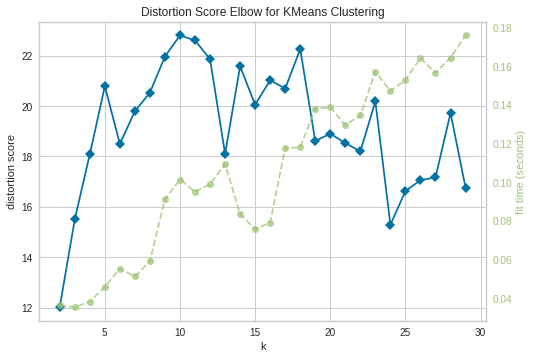

In [26]:

from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,30))
visualizer.fit(scaled_1) 
visualizer.poof()  




In [27]:
#ilk senaryo için 3 küme iyi bir sonuç verecek gibi 
kmeans_1 = KMeans(n_clusters = 3).fit(scaled_1)
kumeler_1 = kmeans_1.labels_


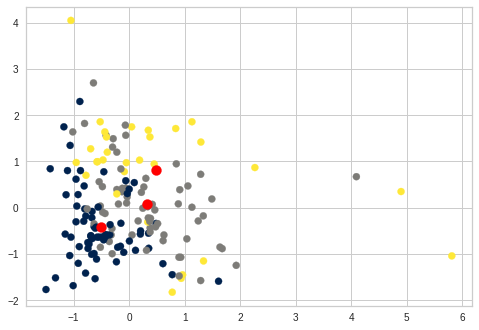

In [32]:
plt.scatter(scaled_1Data.iloc[:,0], scaled_1Data.iloc[:,1], c = kmeans_1.labels_, s = 50, cmap = "cividis")
merkezler = kmeans_1.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "red", s = 100);

In [33]:
#6 küme için deneyelim
kmeans_1 = KMeans(n_clusters = 6).fit(scaled_1)
kumeler_1 = kmeans_1.labels_


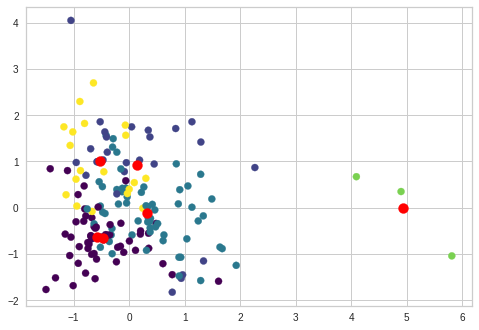

In [39]:
plt.scatter(scaled_1Data.iloc[:,0], scaled_1Data.iloc[:,1], c = kmeans_1.labels_, s = 50, cmap = "viridis")
merkezler = kmeans_1.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "red", s = 100);

In [42]:
kmeans_predict_1= kmeans_1.fit_predict(scaled_1)
kmeans_1_Data= pd.DataFrame(data)
kmeans_1_Data['Clusters']=kumeler_1
kmeans_1_Data.head(15)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,5
Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2
Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2
Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1


* İKİNCİ SENARYO İÇİN OPTİMUM KÜME SAYISININ BELİRLENMESİ ve KMEANS ALGORİTMASININ UYGULANMASI

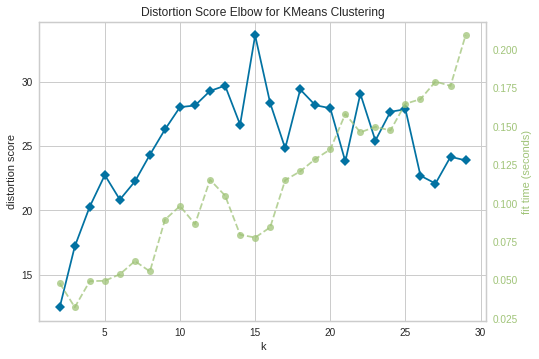

In [43]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,30))
visualizer.fit(scaled_2) 
visualizer.poof()  

In [44]:
#ikinci senaryo için 2 küme oluşturalım
kmeans_2 = KMeans(n_clusters = 2).fit(scaled_2)
kumeler_2 = kmeans_2.labels_


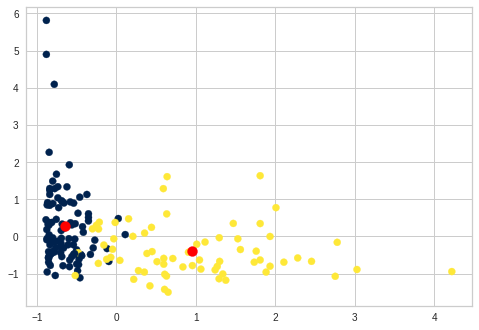

In [45]:
#
plt.scatter(scaled_2Data.iloc[:,0], scaled_2Data.iloc[:,1], c = kmeans_2.labels_, s = 50, cmap = "cividis")
merkezler = kmeans_2.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "red", s = 100);

In [54]:
#ikinci senaryo için 6 küme oluşturalım
kmeans_2 = KMeans(n_clusters = 4).fit(scaled_2)
kumeler_2 = kmeans_2.labels_


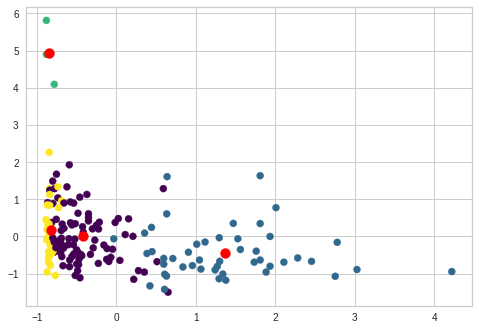

In [55]:
# 6 küme oluşturulduğunda daha doğru sonuç elde edilmesi daha olası bir ihtimal.
plt.scatter(scaled_2Data.iloc[:,0], scaled_2Data.iloc[:,1], c = kmeans_2.labels_, s = 50, cmap = "viridis")
merkezler = kmeans_2.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "red", s = 100);

In [56]:
kmeans_predict_2= kmeans_2.fit_predict(scaled_2)
kmeans_2_Data= pd.DataFrame(data)
kmeans_2_Data['Clusters']=kumeler_2
kmeans_2_Data.head(15)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,3
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,3


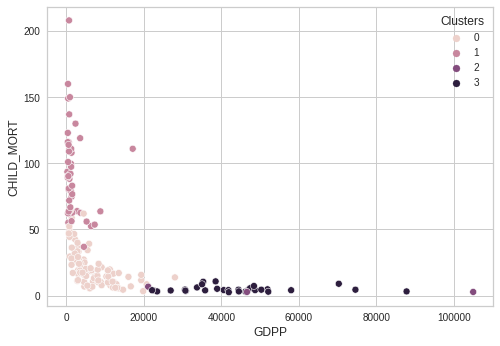

In [57]:
sns.scatterplot(kmeans_2_Data['gdpp'],kmeans_2_Data['child_mort'],hue='Clusters',data=kmeans_2_Data) 

plt.xlabel("GDPP", fontsize=12)
plt.ylabel("CHILD_MORT", fontsize=12)
plt.show()

In [111]:
cluster_0=kmeans_2_Data[kmeans_2_Data['Clusters']==0]
cluster_1=kmeans_2_Data[kmeans_2_Data['Clusters']==1]
cluster_2=kmeans_2_Data[kmeans_2_Data['Clusters']==2]
cluster_3=kmeans_2_Data[kmeans_2_Data['Clusters']==3]

In [112]:
print(len(cluster_0))
print(len(cluster_1))
print(len(cluster_2))
print(len(cluster_3))

87
31
27
3


In [113]:
cluster_0

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
country,,,,,,,,,,
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0
Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,0
Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0


In [114]:
cluster_1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
country,,,,,,,,,,
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,1
Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1
Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1
Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1
Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1
Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1
France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,1


In [115]:
cluster_2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
country,,,,,,,,,,
Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2
Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2
Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2
Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2
Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2
Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2
Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2
Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2
"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,2


In [116]:
cluster_3

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
country,,,,,,,,,,
Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3
Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3
Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3


#HİYERARŞİK KÜMELEME

* İlk Senaryo İçin Bakalım

In [70]:
#linkage'de ölçüm metriği olarak öklid kullanılır ve method kısmında herhangi bir ölçüt belirtilmezse default olarak 'single'kullanılır.
#Diğer kullanılabilecek metotlar 'complete' ,'average', 'weighted' 'centroid','median','ward' kullanılabilir
#method olarak average ve centroid kullanarak dendogram oluşturalım
average_cluster = linkage(scaled_1, "average")
centroid_cluster= linkage(scaled_1,method='centroid')

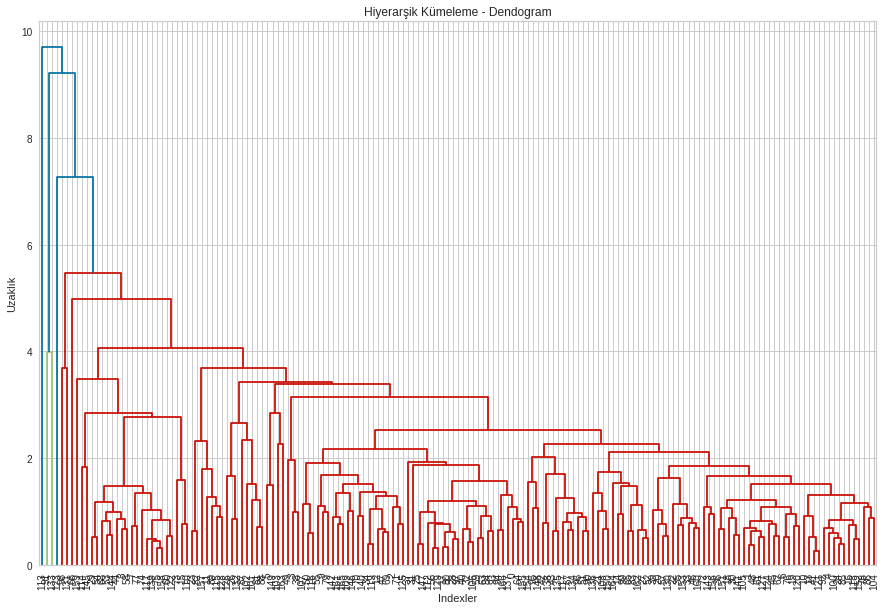

In [71]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    average_cluster,
    leaf_font_size=10
);

* AgglomerativeClustering linkage parametresi "ward", "complete", "average", "single" gibi opsiyonları bulundurur, eğer bu parametreyi belirtmezsek default olarak "ward" opsiyonunu kullanır. Ward opsiyonu küme içinde minimum varyans olacak şekilde kümeleme işlemi yapar.
* n_clusters parametresi ile kaç küme oluşturmak istediğimizi belirtiriz eğer herhangi bir değer belirtmezsek default olarak bize veri setini 2 kümeye ayıracaktır.
* Diğer parametreler ile ilgili daha fazla bilgi için 'AgglomerativeClustering?' ile gerekli bilgilere ulaşabilirsiniz.

In [72]:
 from sklearn.cluster import AgglomerativeClustering
 cluster = AgglomerativeClustering(n_clusters=3).fit(scaled_1)

In [73]:
labels=cluster.fit_predict(scaled_1)

In [75]:

Aggromerative_1_Data= pd.DataFrame(data)
Aggromerative_1_Data['Clusters']=labels
Aggromerative_1_Data.head(15)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1
Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1
Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1
Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0


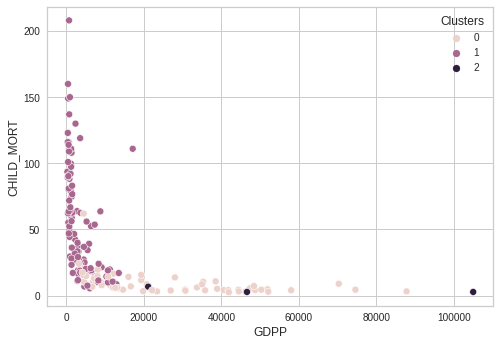

In [84]:
sns.scatterplot(Aggromerative_1_Data['gdpp'],Aggromerative_1_Data['child_mort'],hue='Clusters',data=Aggromerative_1_Data) 

plt.xlabel("GDPP", fontsize=12)
plt.ylabel("CHILD_MORT", fontsize=12)
plt.show()

* İkinci Senaryo İçin

In [88]:
 from sklearn.cluster import AgglomerativeClustering
 cluster_2 = AgglomerativeClustering(n_clusters=4).fit(scaled_2)

In [89]:
labels_2=cluster_2.fit_predict(scaled_2)

In [92]:

Aggromerative_2_Data= pd.DataFrame(data)
Aggromerative_2_Data['Clusters']=labels_2
Aggromerative_2_Data.head(20)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,2
Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1


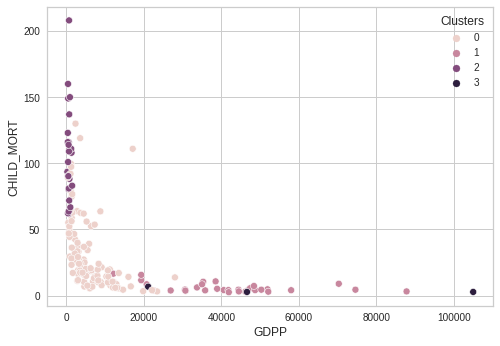

In [93]:
sns.scatterplot(Aggromerative_2_Data['gdpp'],Aggromerative_2_Data['child_mort'],hue='Clusters',data=Aggromerative_2_Data) 

plt.xlabel("GDPP", fontsize=12)
plt.ylabel("CHILD_MORT", fontsize=12)
plt.show()

In [102]:
cluster0=Aggromerative_2_Data[Aggromerative_2_Data['Clusters']==0]
cluster1=Aggromerative_2_Data[Aggromerative_2_Data['Clusters']==1]
cluster2=Aggromerative_2_Data[Aggromerative_2_Data['Clusters']==2]
cluster3=Aggromerative_2_Data[Aggromerative_2_Data['Clusters']==3]

In [103]:
print(len(cluster0))
print(len(cluster1))
print(len(cluster2))
print(len(cluster3))

106
31
27
3


In [107]:
cluster0

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
country,,,,,,,,,,
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0
...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0


In [108]:
cluster1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
country,,,,,,,,,,
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,1
Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1
Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1
Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1
Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1
Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1
France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,1


In [109]:
cluster2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
country,,,,,,,,,,
Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2
Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2
Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2
Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2
Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2
Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2
Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2
Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2
"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,2


In [110]:
cluster3

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
country,,,,,,,,,,
Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3
Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3
Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3


#RAPOR

* Hiyerarşik olmayan kümeleme yöntemlerinde 2.senaryo için yapılan kümeleme analizinde 4 farklı küme oluşturuldu.
* Bu kümelerden cluster3'teki ülkelerin en gelişmiş ülkeler olduğu ve bu ülkelerin nispeten maddi desteğe ihtiyacı olmadığı, Cluster2'deki 27 ülkelerin çok az gelişmiş ülkeler olduğu ve kesinlikle desteklenmesi gerektiği, Cluster1'deki ülkelerin gelişmiş ülkelerin olduğu ve son olarak Cluster0'da bulunan 106 ülkenin ise az gelişmiş ve gelişmekte olan ülkeler olduğu söylenebilir.
* Tüm bunlara bakılarak maddi destek verilecek ülkeler belirlenirken **Cluster2** ve **Cluster0** ülkelerinin incelenmesi ve bu gruptaki ülkelere maddi destekte bulunulması doğru bir karar olacaktır.

* Hiyerrşik kümeleme yöntemlerinde K-Means algoritmasıyla veri seti 4 kümeye ayrıldı.
* Cluster0' da bulunan 87 ülke gelişmekte olan ülkeler, Cluster1'deki 31 ülke gelişmiş ülkeler, Cluster2'deki 27 ülke az gelişmiş ülkeler ve Cluster3'deki ülkeler ise çok gelişmiş ülkeler olarak yorumlandı.
* **Cluster2**'de bulunan ülkelere mutlaka maddi destek sağlanması gerektiği ve yeterli maddi imkan varsa **Cluster0**'daki ülkelerin incelenip gerekli ülkelerin desteklenmesi gerektiği söylenebilir.

* Hiyerarşik olmayan kümeleme yöntemi ve hiyerarşik kümeleme yöntemi sonuçları karşılaştırıldığında her iki yöntemdede destek veriilmesi gereken cluster etiketleri aynı çıkmakla beraber, K-Means Algoritması kullanılarak yapılan kümeleme işleminin ülkeleri daha iyi kümelediği söylenebilir.